<a href="https://colab.research.google.com/github/KsKarim7/CS-ft-BracU/blob/main/Coronary_Heart_Disease_Prediction_Model_21301628_24341262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Required Packeges

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns

# Packeges for ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
dataset = pd.read_csv('/content/data_cardiovascular_risk.csv')
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
dataset.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
dataset['sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
dataset['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
dataset = dataset.drop(columns='id')
dataset.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Check For Imbalanced Dataset

Class distribution:
TenYearCHD
0    2879
1     511
Name: count, dtype: int64
Percentage difference between the frequency of unique classes: 82.25%



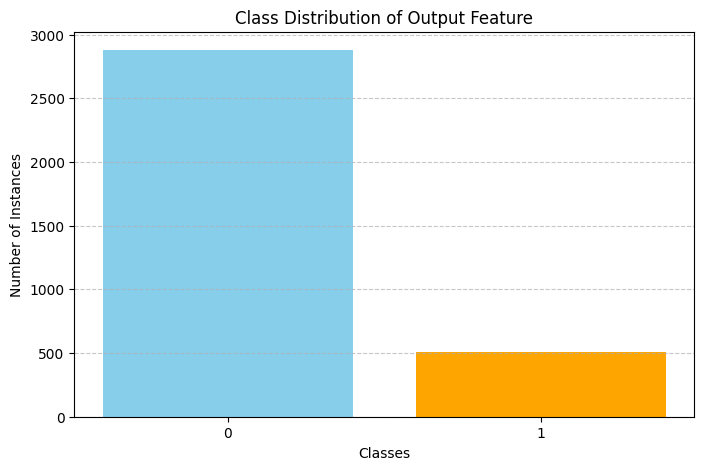

In [ ]:
output_feature = 'TenYearCHD'
class_counts = dataset[output_feature].value_counts()

print("Class distribution:")
print(class_counts)

# Differene in the number of instances per unique classes
if len(class_counts) > 1:
    max_class = class_counts.max()
    min_class = class_counts.min()
    difference_percentage = ((max_class - min_class) / max_class) * 100
    print(f"Percentage difference between the frequency of unique classes: {difference_percentage:.2f}%\n")

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'orange'])
plt.title('Class Distribution of Output Feature')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

# one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(dataset[categorical_columns])

#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([dataset, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
# print(df_encoded)
df_encoded.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,1.0,0.0,0.0,1.0
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0.0,1.0,1.0,0.0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1.0,0.0,0.0,1.0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0.0,1.0,0.0,1.0
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1.0,0.0,0.0,1.0


In [ ]:
ten_year_chd_column = df_encoded.pop('TenYearCHD')
df_encoded['TenYearCHD'] = ten_year_chd_column
df_encoded.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0,0.0,0.0,1.0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0,1.0,1.0,0.0,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,1.0,0.0,0.0,1.0,0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,0.0,1.0,0.0,1.0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,1.0,0.0,0.0,1.0,0


In [ ]:
df_encoded.isnull().sum()

,0
age,0
education,87
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,38
sysBP,0
diaBP,0


In [ ]:
columns_with_nulls = df_encoded.columns[df_encoded.isnull().any()].tolist()

for columns in columns_with_nulls:
    df_encoded[columns] = df_encoded[columns].fillna('Unknown')  # Temporarily handle missing
    df_encoded[columns] = df_encoded[columns].astype('category').cat.codes

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)
df_encoded[columns_with_nulls] = imputer.fit_transform(df_encoded[columns_with_nulls])
df_encoded.isnull().sum()

,0
age,0
education,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0
diaBP,0


In [ ]:
imput_it = IterativeImputer()
imput_it.fit_transform(df_encoded)

array([[64.,  1.,  3., ...,  0.,  1.,  1.],
       [36.,  3.,  0., ...,  1.,  0.,  0.],
       [46.,  0., 10., ...,  0.,  1.,  0.],
       ...,
       [44.,  2.,  3., ...,  0.,  1.,  1.],
       [60.,  0.,  0., ...,  1.,  0.,  0.],
       [54.,  2.,  0., ...,  1.,  0.,  0.]])

In [ ]:
df_encoded.head() # delete

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,64,1.0,3.0,0.0,0,0,0,85.0,148.0,85.0,1259.0,43.0,35.0,1.0,0.0,0.0,1.0,1
1,36,3.0,0.0,0.0,0,1,0,76.0,168.0,98.0,934.0,25.0,30.0,0.0,1.0,1.0,0.0,0
2,46,0.0,10.0,0.0,0,0,0,114.0,116.0,71.0,141.0,41.0,49.0,1.0,0.0,0.0,1.0,0
3,50,0.0,20.0,0.0,0,1,0,97.0,158.0,88.0,814.0,21.0,49.0,0.0,1.0,0.0,1.0,1
4,64,0.0,23.0,0.0,0,0,0,105.0,136.5,85.0,654.0,23.0,32.0,1.0,0.0,0.0,1.0,0


In [ ]:
df_correlation = df_encoded.corr()
df_correlation

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
age,1.000000,-0.147090,-0.203783,0.119242,0.059038,0.308826,0.107875,0.278439,0.404845,0.221896,0.144973,-0.002776,0.038022,0.041882,-0.041882,0.210997,-0.210997,0.224927
education,-0.147090,1.000000,0.003148,-0.019064,-0.036509,-0.078092,-0.042257,-0.023204,-0.128215,-0.050820,-0.094263,-0.060263,0.003125,-0.038800,0.038800,-0.016359,0.016359,-0.047271
cigsPerDay,-0.203783,0.003148,1.000000,-0.034047,-0.043608,-0.099418,-0.049706,-0.019979,-0.118410,-0.087518,-0.130316,0.074799,-0.032897,-0.318328,0.318328,-0.841878,0.841878,0.055131
BPMeds,0.119242,-0.019064,-0.034047,1.000000,0.088989,0.178544,0.041157,0.064863,0.188713,0.132903,0.029817,0.006827,-0.000778,0.060318,-0.060318,0.030683,-0.030683,0.054969
prevalentStroke,0.059038,-0.036509,-0.043608,0.088989,1.000000,0.071652,0.010115,-0.010477,0.057568,0.047235,0.021148,-0.018990,0.001363,0.011273,-0.011273,0.043703,-0.043703,0.068627
prevalentHyp,0.308826,-0.078092,-0.099418,0.178544,0.071652,1.000000,0.082565,0.150975,0.699285,0.612897,0.293922,0.150637,0.039022,-0.003072,0.003072,0.119325,-0.119325,0.166544
diabetes,0.107875,-0.042257,-0.049706,0.041157,0.010115,0.082565,1.000000,0.043535,0.124011,0.061165,0.086837,0.039749,0.219626,-0.008853,0.008853,0.053333,-0.053333,0.103681
totChol,0.278439,-0.023204,-0.019979,0.064863,-0.010477,0.150975,0.043535,1.000000,0.193404,0.149063,0.129870,0.085199,0.088146,0.093544,-0.093544,0.038189,-0.038189,0.090977
sysBP,0.404845,-0.128215,-0.118410,0.188713,0.057568,0.699285,0.124011,0.193404,1.000000,0.781908,0.318611,0.178364,0.052054,0.037369,-0.037369,0.145721,-0.145721,0.212703
diaBP,0.221896,-0.050820,-0.087518,0.132903,0.047235,0.612897,0.061165,0.149063,0.781908,1.000000,0.368256,0.175324,0.021726,-0.058840,0.058840,0.124318,-0.124318,0.135979


In [ ]:
# df_correlation.to_csv('correlation_matrix.csv')

<Axes: >

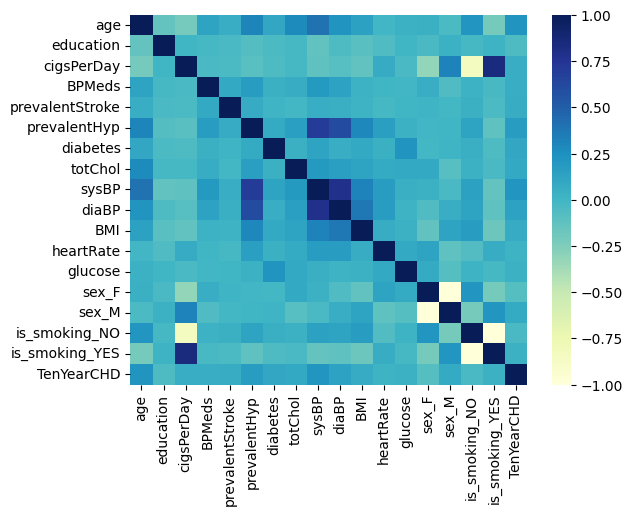

In [ ]:
sns.heatmap(df_correlation, cmap = 'YlGnBu')

In [ ]:
FEATURES = df_encoded.iloc[:, :-1].values
TARGET = df_encoded.iloc[:, -1].values

In [ ]:
print(FEATURES[0])
print()
print(TARGET)

[6.400e+01 1.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 8.500e+01 1.480e+02 8.500e+01 1.259e+03 4.300e+01 3.500e+01 1.000e+00
 0.000e+00 0.000e+00 1.000e+00]

[1 0 0 ... 1 0 0]


Logistic Regression

Training Accuracy: 0.8525073746312685
Testing Accuracy: 0.8633235004916421
Confusion Matrix:
[[868   0]
 [139  10]]


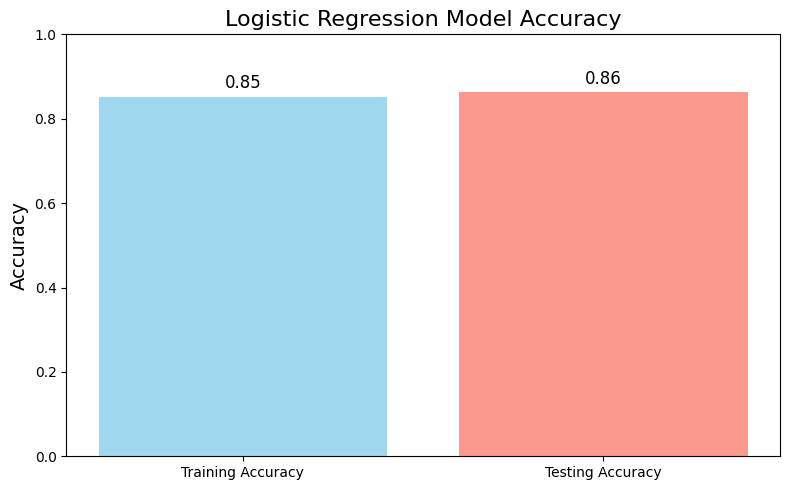


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       868
           1       1.00      0.07      0.13       149

    accuracy                           0.86      1017
   macro avg       0.93      0.53      0.53      1017
weighted avg       0.88      0.86      0.81      1017



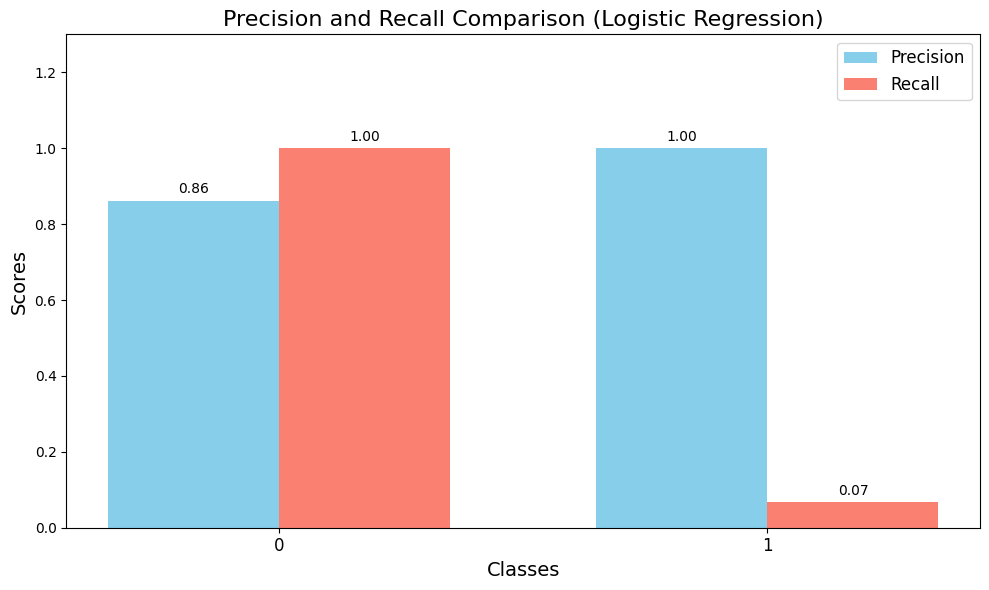

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(FEATURES, TARGET, test_size=0.3, random_state=42)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print accuracy
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['skyblue', 'salmon'], alpha=0.8)
plt.ylim(0, 1)
plt.title('Logistic Regression Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)

plt.text(0, train_accuracy + 0.02, f'{train_accuracy:.2f}', ha='center', fontsize=12)
plt.text(1, test_accuracy + 0.02, f'{test_accuracy:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))

report = classification_report(y_test, y_pred_test, output_dict=True)
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]

x = np.arange(len(classes))
width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, precision, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall, width, label='Recall', color='salmon')

plt.title('Precision and Recall Comparison (Logistic Regression)', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(x, classes, fontsize=12)
plt.ylim(0, 1.3)
plt.legend(fontsize=12)

for i in range(len(classes)):
    plt.text(i - width/2, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', fontsize=10)
    plt.text(i + width/2, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


KNN

Training Accuracy: 0.8605141171512853
Testing Accuracy: 0.8348082595870207
Confusion Matrix:
[[843  25]
 [143   6]]


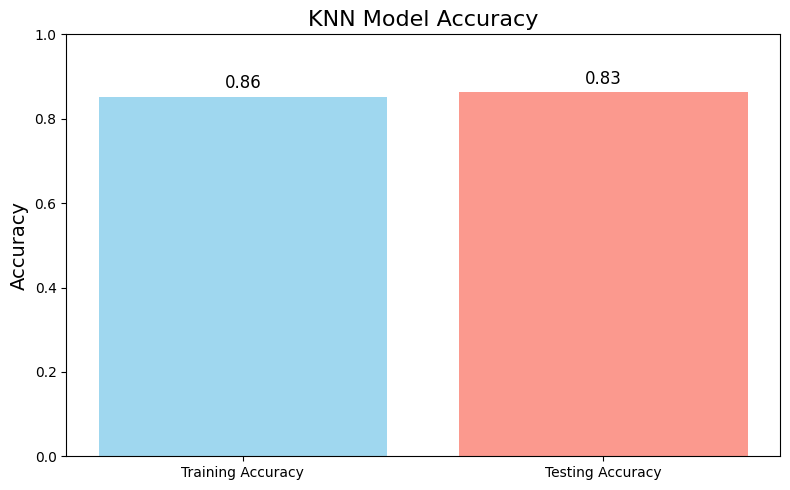

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       868
           1       0.19      0.04      0.07       149

    accuracy                           0.83      1017
   macro avg       0.52      0.51      0.49      1017
weighted avg       0.76      0.83      0.79      1017



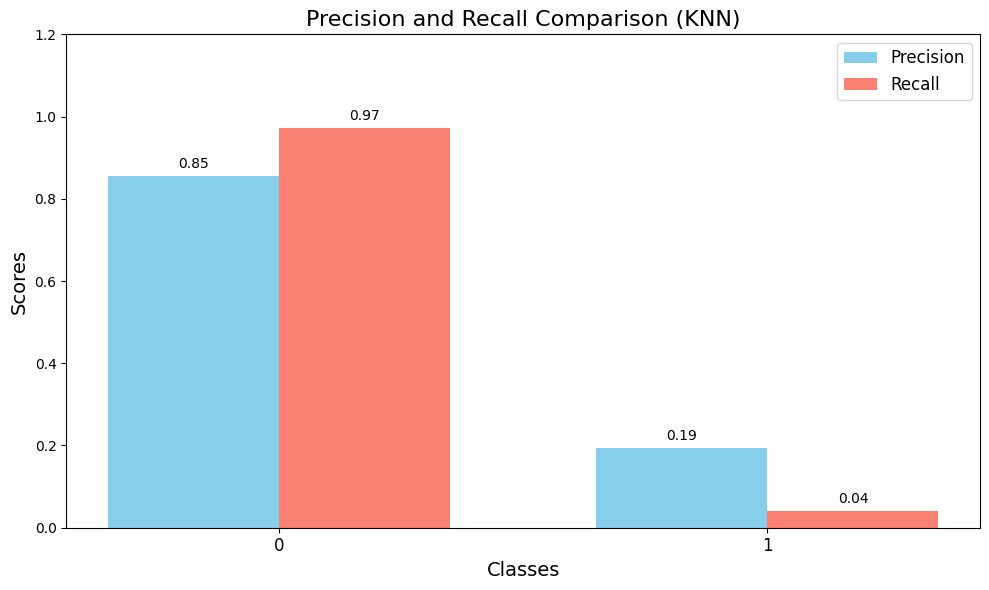

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
y_pred_For_train = KNN.predict(x_train)

print("Training Accuracy:", metrics.accuracy_score(y_train, y_pred_For_train))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

training_accuracy = metrics.accuracy_score(y_train, y_pred_For_train)
testing_accuracy = metrics.accuracy_score(y_test, y_pred)

categories = ['Training Accuracy', 'Testing Accuracy']
accuracies = [training_accuracy, testing_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['skyblue', 'salmon'], alpha=0.8)
plt.ylim(0, 1)
plt.title('KNN Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.text(0, train_accuracy + 0.02, f'{training_accuracy:.2f}', ha='center', fontsize=12)
plt.text(1, test_accuracy + 0.02, f'{testing_accuracy:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred_test = KNN.predict(x_test)
y_pred_train = KNN.predict(x_train)

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))

report = classification_report(y_test, y_pred_test, output_dict=True)
classes = list(report.keys())[:-3]
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]

x = np.arange(len(classes))
width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, precision, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall, width, label='Recall', color='salmon')

plt.title('Precision and Recall Comparison (KNN)', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(x, classes, fontsize=12)
plt.ylim(0, 1.2)
plt.legend(fontsize=12)

for i in range(len(classes)):
    plt.text(i - width/2, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', fontsize=10)
    plt.text(i + width/2, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Naive Bayes

Training Accuracy: 0.8179519595448799
Testing Accuracy: 0.8249754178957719
Confusion Matrix:
[[808  60]
 [118  31]]


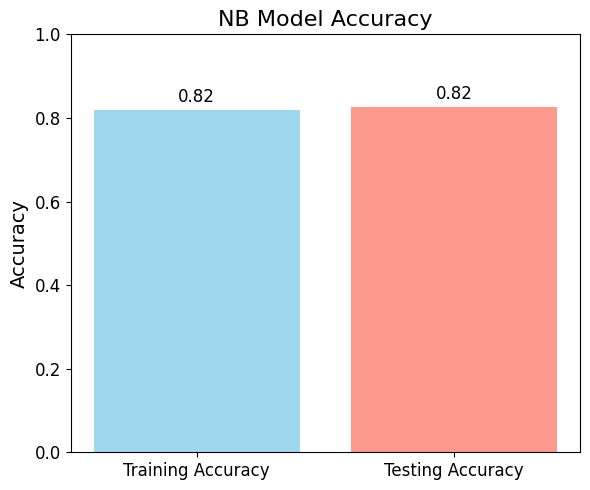

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       868
           1       0.34      0.21      0.26       149

    accuracy                           0.82      1017
   macro avg       0.61      0.57      0.58      1017
weighted avg       0.79      0.82      0.81      1017



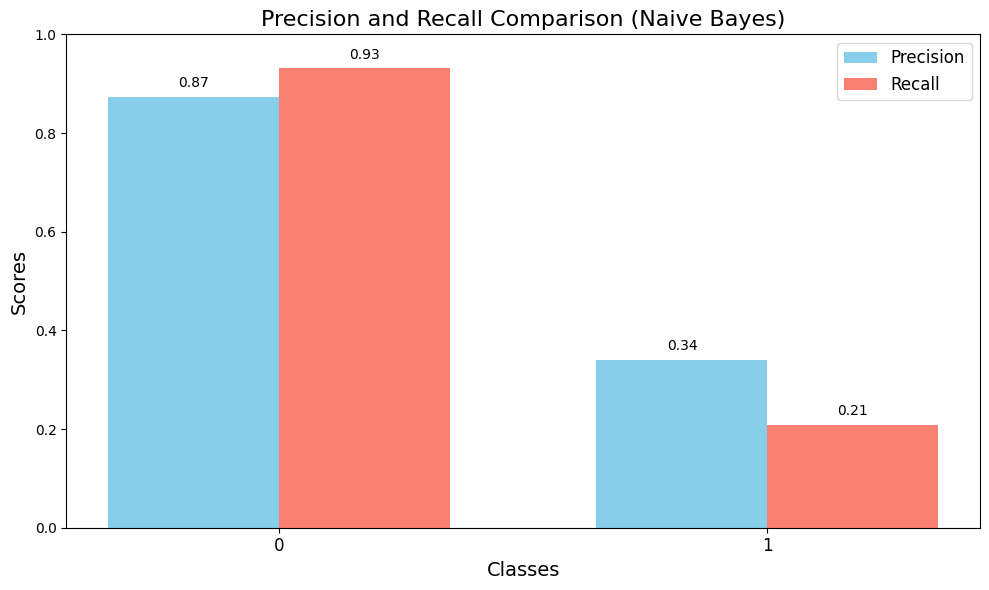

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

categories = ['Training Accuracy', 'Testing Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(6, 5))
plt.bar(categories, accuracies, color=['skyblue', 'salmon'], alpha=0.8)
plt.ylim(0, 1)
plt.title('NB Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.text(0, train_accuracy + 0.02, f'{train_accuracy:.2f}', ha='center', fontsize=12)
plt.text(1, test_accuracy + 0.02, f'{test_accuracy:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred))

classes = list(report.keys())[:-3]
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]

x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, precision, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall, width, label='Recall', color='salmon')
plt.title('Precision and Recall Comparison (Naive Bayes)', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(x, classes, fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)

for i in range(len(classes)):
    plt.text(i - width/2, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', fontsize=10)
    plt.text(i + width/2, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()